In [27]:
import scanpy as sc
import spapros as sp
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import pickle

figure(figsize=(15, 10), dpi=300)

<Figure size 4500x3000 with 0 Axes>

<Figure size 4500x3000 with 0 Axes>

In [2]:
#sc.settings.verbosity = 0
sc.logging.print_header()
print(f"spapros=={sp.__version__}")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
spapros==0.1.1


In [3]:
adata = sc.read_h5ad("/scratch/nmq407/ds_obj_sce_h5ad")
adata

AnnData object with n_obs × n_vars = 10000 × 21813
    obs: 'hash.mcl.ID', 'batch', 'group', 'clusters', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [4]:
adata_00 = adata[adata.obs_names, adata.var_names]
adata_00.obs['celltype'] = adata.obs['clusters']
adata_00.obsm['X_umap'] = adata.obsm['UMAP'].to_numpy()
sc.pp.highly_variable_genes(adata_00,flavor="cell_ranger",n_top_genes=5000)
adata_00

/tmp/ipykernel_28799/2405372556.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_00.obs['celltype'] = adata.obs['clusters']
/tools/anaconda/envs/nmq407/fgf1_ygg/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 10000 × 21813
    obs: 'hash.mcl.ID', 'batch', 'group', 'clusters', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'ident', 'celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'hvg'
    obsm: 'PCA', 'UMAP', 'X_umap'
    layers: 'logcounts'

In [5]:
adata_00.obsm['X_umap']

array([[ -7.02335328,  -9.20730547],
       [ -3.2514903 ,  10.25624319],
       [  8.26936418,   9.09745832],
       ...,
       [ -5.25574511, -11.29130129],
       [  8.81709939, -15.59624915],
       [ -3.09392256,  -8.1864448 ]])

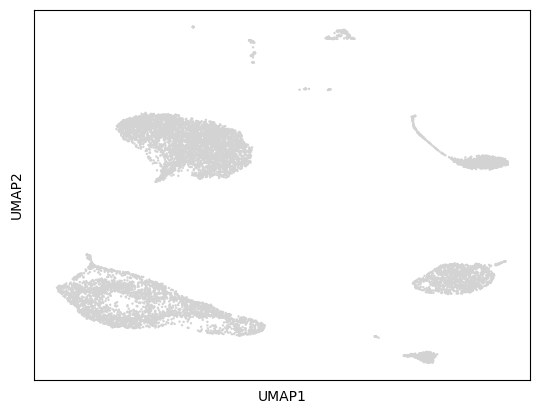

In [6]:
sc.pl.umap(adata_00)

In [7]:
selector = sp.se.ProbesetSelector(adata_00,
                                  n=100,
                                  celltype_key="clusters",
                                  verbosity=1,
                                  save_dir='data_anon/',
                                  n_jobs=40)

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 c13 : 12
	 c14 : 11
	 c15 : 6
	 c16 : 5
	 c17 : 4
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().
Searching for previous results in data_anon/


In [8]:
selector.select_probeset()

SPAPROS PROBESET SELECTION:                                                                      0:00:00
PCA genes already selected..................................................................  
Train baseline forest based on DE genes................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   4/4 0:00:00
  Differentially expressed genes already selected...........................................  
  Prior forest for DE_baseline forest already trained.......................................  
  DE genes already added....................................................................  
  DE_baseline forest already trained........................................................  
Train final forests....................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:00:00
  Forest on pre/prior/pca selected genes already trained....................................  
  Genes from DE_baseline_forest were already added..........................................  
  Final forest was alread trained...........................................................  
Compile probeset list..................................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
FINISHED

In [9]:
selector.probeset

,gene_nr,selection,rank,marker_rank,tree_rank,importance_score,pca_score,pre_selected,prior_selected,pca_selected,celltypes_DE_1vsall,celltypes_DE_specific,celltypes_DE,celltypes_marker,list_only_ct_marker,required_marker,required_list_marker
Rundc3b,1,True,1.0,1.0,1.0,0.993941,0.028752,False,False,False,c16,,c16,c16,False,True,False
Slc24a2,2,True,1.0,1.0,1.0,0.966571,0.772834,False,False,True,c3,,c3,c3,False,True,False
Inpp5d,3,True,1.0,1.0,1.0,0.924682,0.293798,False,False,False,c9,,c9,c9,False,True,False
Sgcz,4,True,1.0,1.0,1.0,0.732439,1.670787,False,False,True,c6,,c6,c6,False,True,False
Prr16,5,True,1.0,1.0,1.0,0.610189,1.351204,False,False,True,c4,,c4,c4,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Niban3,4996,False,NaN,NaN,NaN,NaN,0.000104,False,False,False,,,,,False,False,False
Padi4,4997,False,NaN,NaN,NaN,NaN,0.000098,False,False,False,,,,,False,False,False
ENSMUSG00000113867,4998,False,NaN,NaN,NaN,NaN,0.000077,False,False,False,,,,,False,False,False
Kif23,4999,False,NaN,NaN,NaN,NaN,0.000076,False,False,False,,,,,False,False,False


In [10]:
selected_set = selector.probeset.index[selector.probeset.selection].tolist()
selected_set

['Rundc3b',
 'Slc24a2',
 'Inpp5d',
 'Sgcz',
 'Prr16',
 'Col23a1',
 'Tnr',
 'Dmd',
 'Gpc5',
 'Cped1',
 'Col25a1',
 'Dlc1',
 'Pcdh15',
 'Wdr17',
 'Slit2',
 'Kcnip4',
 'Kirrel3',
 'Efna5',
 'Il1rapl2',
 'Lhfpl3',
 'Edil3',
 'Ebf1',
 'Rmst',
 'Grm7',
 'Ctnna2',
 'Qk',
 'Trpm3',
 'Cadm2',
 'Nrxn1',
 'Slc4a4',
 'Lrrc4c',
 'Nrg3',
 'Malat1',
 'Lsamp',
 'P3h2',
 'Lrp1b',
 'Kcnd2',
 'Nkain2',
 'Pdzrn3',
 'Ank2',
 'Fat3',
 'Pcdh7',
 'Slc1a2',
 'Opcml',
 'Sox6',
 'Mir99ahg',
 'Prkg1',
 'Ntm',
 'Pitpnc1',
 'Pde4b',
 'Dcc',
 'Dlg2',
 'Tanc2',
 'Chl1',
 'Zbtb20',
 'Lrrtm4',
 'Npas3',
 'Rora',
 'Fgf14',
 'Agbl4',
 'B3galt1',
 'Sik3',
 'Ntrk2',
 'Nlgn1',
 'Nav3',
 'Pcdh9',
 'Anks1b',
 'St18',
 'Luzp2',
 'Adgrb3',
 'Gpc6',
 'ENSMUSG00000097311',
 'Cadps2',
 '1700047M11Rik',
 'Cntnap2',
 'Bcas1',
 'Lyn',
 'Septin7',
 'Rtl4',
 'Ror1',
 'Egfl7',
 'Adgrl3',
 'Rfx3',
 'Ptprt',
 'Il1rapl1',
 'Mdga2',
 'Frmd5',
 'Magi2',
 'Nebl',
 'Dock4',
 'Rbfox1',
 'Map2',
 'Nalf1',
 'Nrxn3',
 'Csmd3',
 'Rgs20',
 'Csmd1',


AttributeError: 'NoneType' object has no attribute 'set_size_inches'

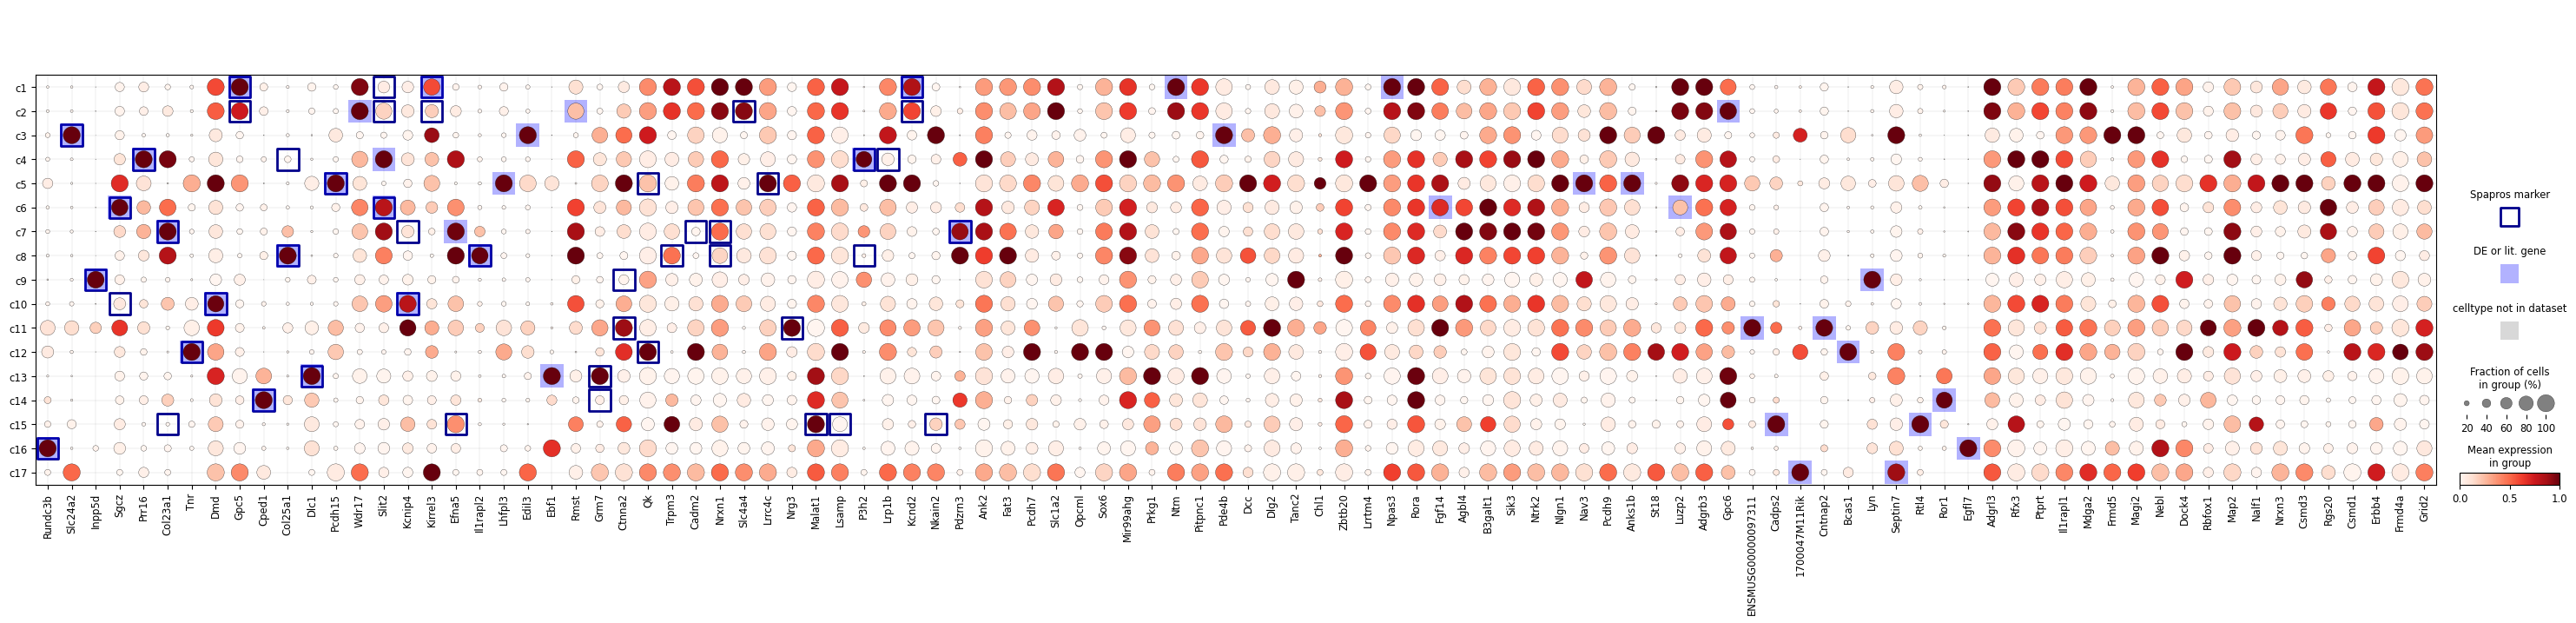

In [11]:
masked_dotplot = sp.pl.masked_dotplot(adata_00, selector)
masked_dotplot.set_size_inches(18.5, 10.5)
masked_dotplot

/tools/anaconda/envs/nmq407/fgf1_ygg/lib/python3.8/site-packages/spapros/plotting/plot.py:1250: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


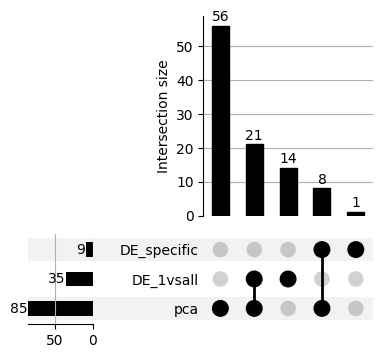

In [12]:
selector.plot_gene_overlap()

In [13]:
evaluator = sp.ev.ProbesetEvaluator(adata_00, verbosity=2, results_dir='evaluate_anon')

In [14]:
evaluator.evaluate_probeset(selected_set, set_id="Spapros")

SPAPROS PROBESET EVALUATION:                                                                     0:46:58
Shared metric computations................................ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:15:26
  Computing shared compuations for knn_overlap............ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:00:35
  Computing shared compuations for gene_corr.............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:28
Probeset specific pre computations........................ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:00:16
  Computing pre compuations for knn_overlap............... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:00:16
Final probeset specific computations...................... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3/3 0:31:14
  Computing final compuations for knn_overlap............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   6/6 0:00:01
  Computing final compuations for forest_clfs............. ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25/25 0:31:09
  Computing final compuations for gene_corr............... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% 0:00:03
FINISHED

In [ ]:
# Reference probesets
reference_sets = sp.se.select_reference_probesets(adata_00, n=100)

In [ ]:
for set_id, df in reference_sets.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)


In [15]:
evaluator.summary_results#.index.tolist()

,knn_overlap mean_overlap_AUC,forest_clfs accuracy,forest_clfs perct acc > 0.8,gene_corr 1 - mean,gene_corr perct max < 0.8
Spapros,0.654358,0.924278,0.985682,0.802978,0.826092


In [23]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

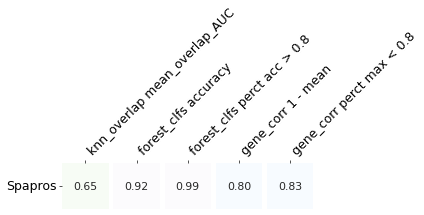

In [20]:
# evaluator.summary_statistics("Spapros")
evaluator.plot_summary()

<Figure size 9000x6000 with 0 Axes>

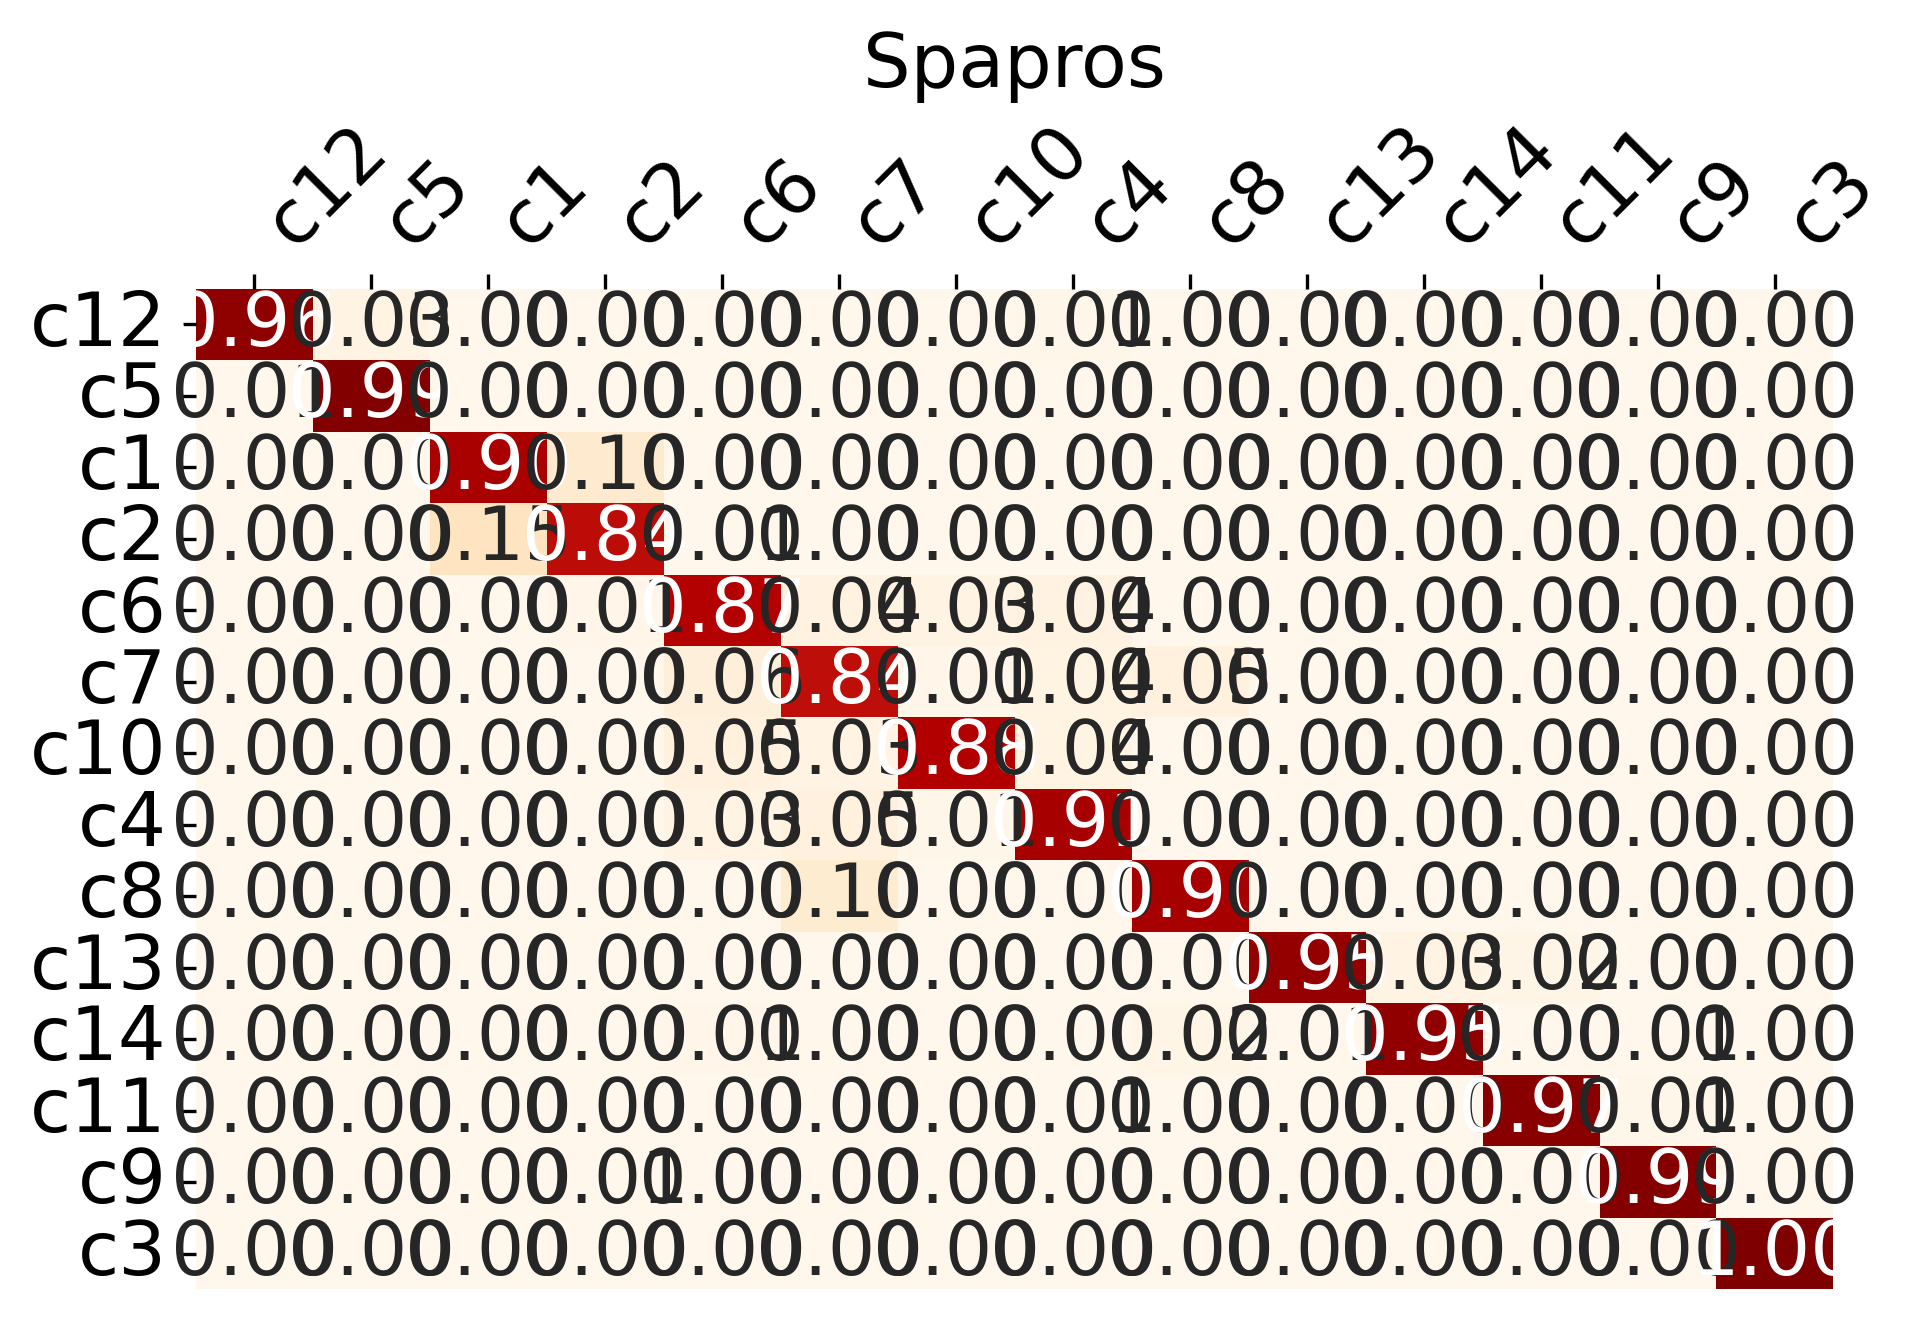

In [25]:
figure(figsize=(30, 20), dpi=300)
evaluator.plot_confusion_matrix()